# Problem statement

##### Prepare a classification model using SVM for predicting the burned area  of the forest

# Importing the libraries

In [1]:
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import seaborn as sn
import pandas as pd
from sklearn.model_selection import GridSearchCV,train_test_split
import numpy as np
import imblearn
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.svm import SVC

# Loading the dataset

In [2]:
forest = pd.read_csv("forestfires.csv")

In [3]:
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


###### We can just peek into few data points by using head function of pandas. By default, head function return top 5 values 

# Data Insights

In [4]:
forest.shape

(517, 31)

In [5]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

### Observations  :-

In [6]:
dups = forest.duplicated()
print('Number of duplicate rows: %d' % dups.sum())

Number of duplicate rows: 8


##### There are 8 duplicate rows, we will delete the duplicate rows.

In [7]:
print('Number of rows before discarding duplicates = %d' % forest.shape[0])

forest = forest.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % forest.shape[0])

Number of rows before discarding duplicates = 517
Number of rows after discarding duplicates = 509


# Summary statistics

In [8]:
forest.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,...,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,90.618075,110.235756,547.787623,9.023576,18.865422,44.253438,4.011395,0.020432,12.992908,0.163065,...,0.017682,0.039293,0.003929,0.062868,0.031434,0.104126,0.003929,0.001965,0.029470,0.337917
std,5.555527,63.804112,248.196222,4.585083,5.841083,16.365192,1.800926,0.296261,64.133357,0.369788,...,0.131921,0.194482,0.062622,0.242965,0.174660,0.305724,0.062622,0.044324,0.169285,0.473466
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,62.300000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.610000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,141.300000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.580000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Understanding the target variable

##### Our main objective is to classify the burned area of forest based on the given parameters. We have a column size_category which has the values small and large (burned forest area)


##### value_counts() method shows how many samples are present for size_category type. 

In [9]:
forest['size_category'].value_counts()

small    371
large    138
Name: size_category, dtype: int64

# Heatmap

##### Heatmap is a very effective technique to check the missing values in the dataset and to also understand if there is any correlation between the features of the data

<AxesSubplot:>

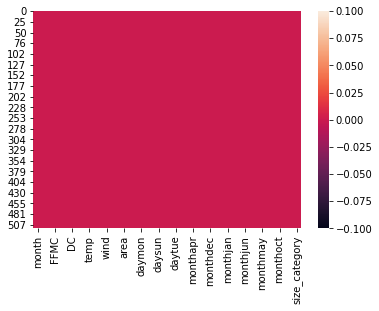

In [10]:
sn.heatmap(forest.isnull())

##### We don't have any missing values in our dataset. If it was present, there would be a different colour shade appearing on the red background. 

# Separating feature data and Label data  and train-test split

##### We will drop the month and day columns from the dataframe as it already encoded with dummy encoding and converted to 0 and 1

In [11]:
forest = forest.drop(['month','day'],axis=1)
forest.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [12]:
X = forest.drop(["size_category"], axis = 1)
           
Y = forest['size_category']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .3, random_state = 30)

In [13]:
X_train

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
12,63.5,70.8,665.3,0.8,17.0,72,6.7,0.0,0.00,1,...,0,0,0,0,0,0,0,0,0,0
138,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36,0,...,0,0,0,1,0,0,0,0,0,0
214,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,0,...,0,0,0,0,0,1,0,0,0,0
509,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,1,...,0,0,0,0,0,0,0,0,0,0
305,89.6,84.1,714.3,5.7,19.0,52,2.2,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1
434,90.6,269.8,811.2,5.5,22.2,45,3.6,0.0,0.00,1,...,0,0,0,0,0,0,0,0,0,0
425,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
Y_train

513    large
12     small
138    small
214    large
509    small
       ...  
507    small
305    small
434    small
425    small
296    small
Name: size_category, Length: 356, dtype: object

In [15]:
X_test

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
355,92.1,99.0,745.3,9.6,20.8,35,4.9,0.0,13.06,1,...,0,0,0,0,0,0,0,0,0,1
360,92.5,122.0,789.7,10.2,18.4,42,2.2,0.0,1.09,1,...,0,0,0,0,0,0,0,0,0,1
314,92.6,115.4,777.1,8.8,19.7,41,1.8,0.0,1.58,0,...,0,0,0,0,0,0,0,0,0,1
363,91.9,111.7,770.3,6.5,15.9,53,2.2,0.0,2.93,0,...,0,0,0,0,0,0,0,0,0,1
135,93.5,139.4,594.2,20.3,17.6,52,5.8,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,88.6,69.7,706.8,5.8,20.6,37,1.8,0.0,0.00,1,...,0,0,0,0,0,0,0,0,0,1
245,91.8,175.1,700.7,13.8,26.8,38,6.3,0.0,0.76,0,...,0,0,0,0,0,0,0,0,0,0
194,94.8,108.3,647.1,17.0,24.6,22,4.5,0.0,10.01,0,...,0,0,0,0,0,0,0,0,0,0
185,91.0,129.5,692.6,7.0,17.6,46,3.1,0.0,7.04,0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
Y_test

355    large
360    small
314    small
363    small
135    small
       ...  
32     small
245    small
194    large
185    large
277    large
Name: size_category, Length: 153, dtype: object

# Using SVM to build the classification model

In [17]:
svm = SVC()
svm.fit(X_train, Y_train)
y_pred_svm = svm.predict(X_test)

y_pred_svm

array(['small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'large',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'large', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'large', 'small', 'small', 'small', 'small',
       'small', 'sma

In [18]:
print(accuracy_score(Y_test, y_pred_svm))

0.7320261437908496


In [19]:
y_pred_train_svm = svm.predict(X_train)

print(accuracy_score(Y_train, y_pred_train_svm))

0.7584269662921348


In [20]:
print(confusion_matrix(Y_test, y_pred_svm))

[[  3  41]
 [  0 109]]


In [21]:
print(classification_report(Y_test, y_pred_svm))

              precision    recall  f1-score   support

       large       1.00      0.07      0.13        44
       small       0.73      1.00      0.84       109

    accuracy                           0.73       153
   macro avg       0.86      0.53      0.48       153
weighted avg       0.81      0.73      0.64       153

